Disini kita akan menggunakan data iris.cv yang dikirim oleh ibu, dengan data ini kita akan mencari apakah sebuah species setosa atau bukan.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Kita ambil dulu datanya
data=pd.read_csv(r"iris.csv")

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
data[data['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [16]:
# Kolumnya dan koefisien yang akan digunakan
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [17]:
# Semua spesies yang ada di data
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
# Disini kita akan memfilter jadi akan dibagi menjadi species masing masing
data_setosa = data[data['species'] == 'setosa']
data_versicolor = data[data['species'] == 'versicolor']
data_virginica = data[data['species'] == 'virginica']

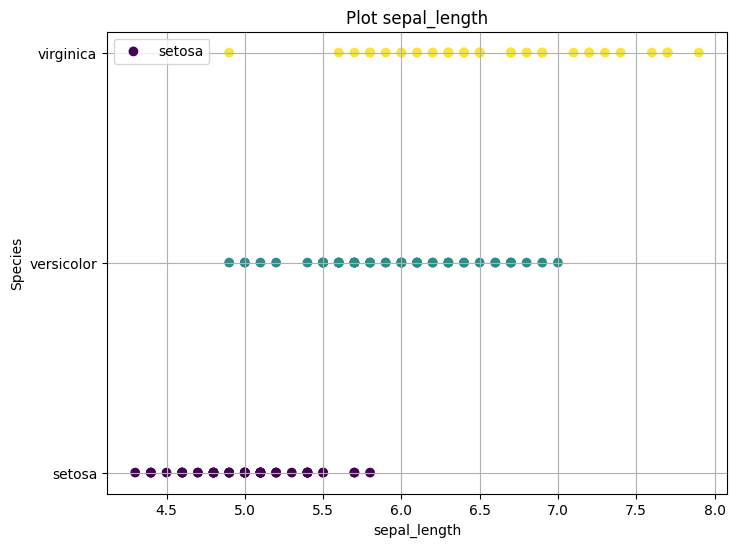

In [27]:
# Plot berdasarkan sepal_width
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['sepal_length'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('sepal_length')
plt.ylabel('Species')
plt.title('Plot sepal_length')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

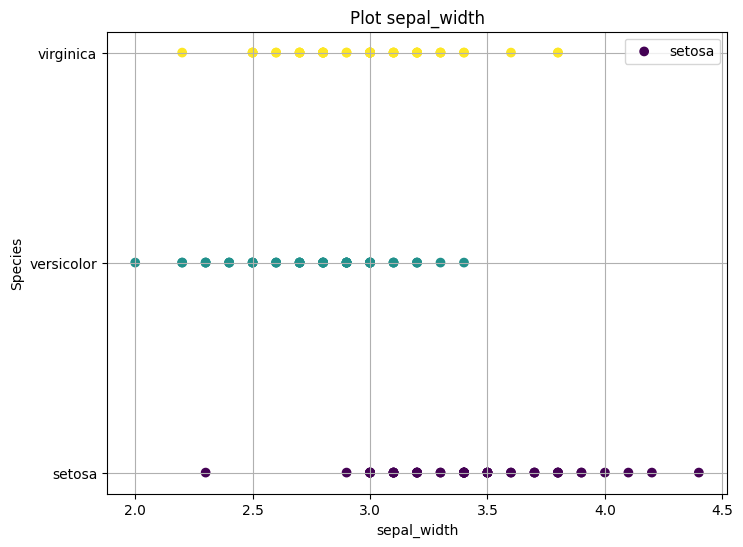

In [28]:
# Plot berdasarkan as
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['sepal_width'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('sepal_width')
plt.ylabel('Species')
plt.title('Plot sepal_width')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

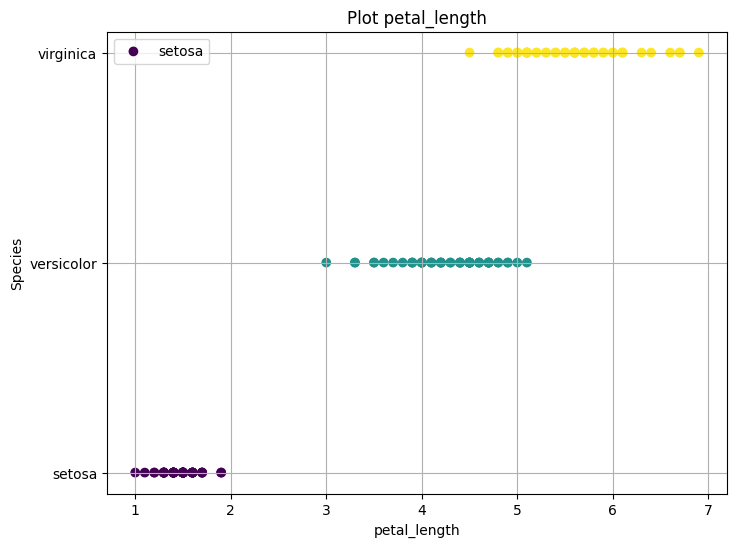

In [30]:
# Plot berdasarkan petal_length
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['petal_length'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('petal_length')
plt.ylabel('Species')
plt.title('Plot petal_length')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

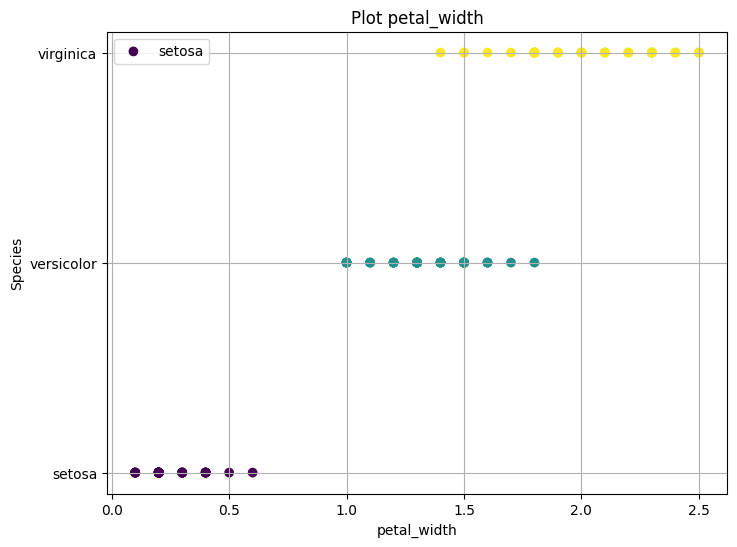

In [31]:
# Plot berdasarkan petal_width
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['petal_width'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('petal_width')
plt.ylabel('Species')
plt.title('Plot petal_width')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

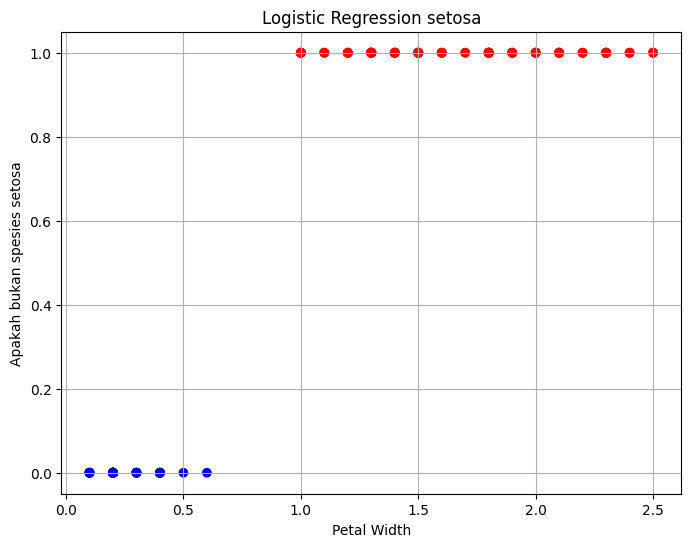

In [41]:
# Define a function to assign y-values based on species
def get_y_value(species):
    if species == 'setosa':
        return 0
    else:
        return 1

# Create lists for x and y values
petal_widths = data['petal_width'].tolist()
y_values = [get_y_value(species) for species in data['species']]

# Create a color list based on y-values (0: blue, 1: red)
colors = ['blue' if val == 0 else 'red' for val in y_values]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(petal_widths, y_values, c=colors)  # Set color for all points

# Label the axes
plt.xlabel('Petal Width')
plt.ylabel('Apakah bukan spesies setosa')

# Add a title
plt.title('Logistic Regression setosa')

# Grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


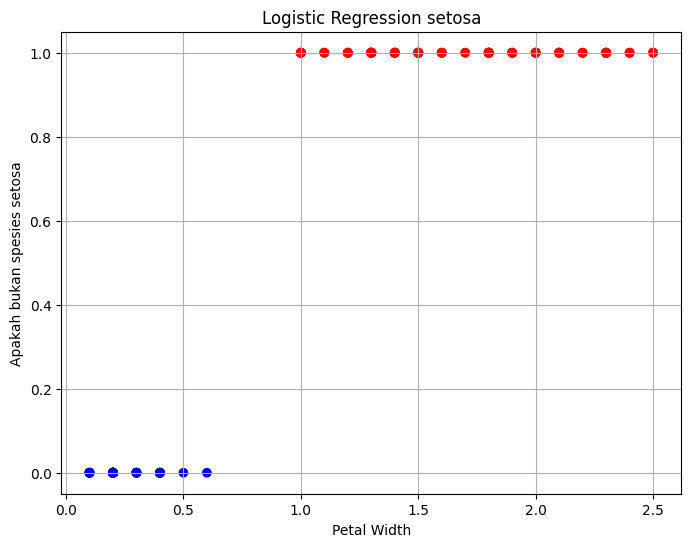

In [47]:
# Add sigmoid

def get_y_value(species):
    if species == 'setosa':
        return 0
    else:

# Create lists for x and y values
petal_widths = data['petal_width'].tolist()
y_values = [get_y_value(species) for species in data['species']]

# Create a color list based on y-values (0: blue, 1: red)
colors = ['blue' if val == 0 else 'red' for val in y_values]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(petal_widths, y_values, c=colors)  # Set color for all points

# Label the axes
plt.xlabel('Petal Width')
plt.ylabel('Apakah bukan spesies setosa')

# Add a title
plt.title('Logistic Regression setosa')

# Grid for better visualization
plt.grid(True)


# Define the sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Create x-axis values (adjust the range as needed)
x_sig = np.linspace(-5, 5, 100)  # 100 points from -5 to 5

# Calculate y-axis values (sigmoid function applied to x)
y_sig = sigmoid(x_sig)

# Plot the sigmoid function
plt.plot(x_sig, y_sig, label='Sigmoid Function')
        return 1
# Show the plot
plt.show()
